C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


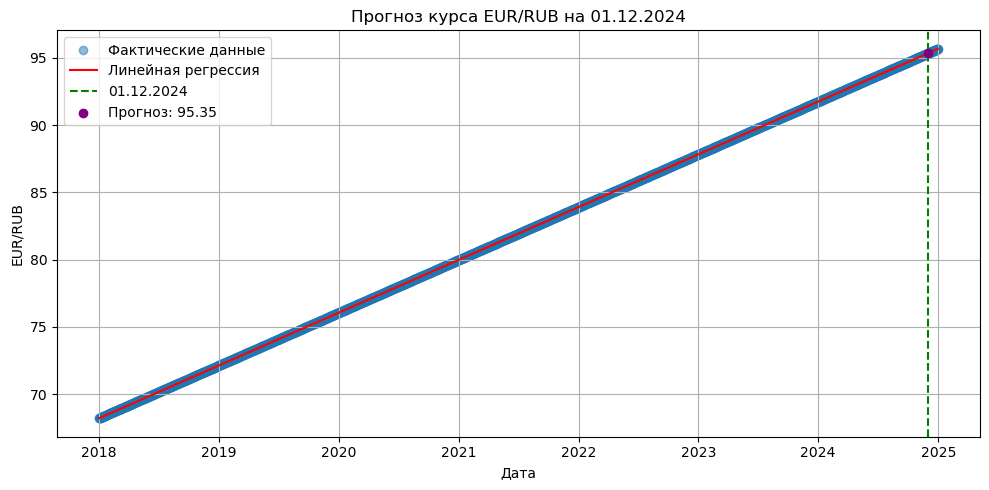

Прогноз на 01.12.2024: 95.35 RUB


In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

file_path = r"C:\Users\User\Desktop\data_VNIS_3k.xlsx"
df = pd.read_excel(file_path, parse_dates=["Date"])

df = df[["Date", "EUR (RUB)"]].dropna()

df["Date"] = pd.to_datetime(df["Date"])
df["Date_ordinal"] = df["Date"].map(datetime.toordinal)

X = df[["Date_ordinal"]]
y = df["EUR (RUB)"]

model = LinearRegression()
model.fit(X, y)

# Прогноз на 1 декабря 2024 года
predict_date = datetime(2024, 12, 1).toordinal()
predicted_value = model.predict([[predict_date]])[0]

plt.figure(figsize=(10, 5))
plt.scatter(df["Date"], y, label="Фактические данные", alpha=0.5)
plt.plot(df["Date"], model.predict(X), color="red", label="Линейная регрессия")
plt.axvline(datetime(2024, 12, 1), color="green", linestyle="--", label="01.12.2024")
plt.scatter(datetime(2024, 12, 1), predicted_value, color="purple", label=f"Прогноз: {predicted_value:.2f}", zorder=5)

plt.title("Прогноз курса EUR/RUB на 01.12.2024")
plt.xlabel("Дата")
plt.ylabel("EUR/RUB")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Прогноз на 01.12.2024: {predicted_value:.2f} RUB")
